# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import m5.config as cfg
from m5.model import train, predict
from m5.evaluate import accuracy
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (14, 4)

## Parameters

In [3]:
level = 1

In [4]:
# Parameters
level = 6


## Train

In [5]:
params = {
    "task": "train",
    "objective": "tweedie",
    "num_iterations": 1000,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "num_threads": 4,
    "early_stopping_round": 100,
}

In [6]:
train(cfg.DATA_DIR, cfg.MODEL_DIR, level, params)

Training model...
[LightGBM] [Info] Load from binary file /home/ariel/Playground/m5-forecasting/data/processed/datasets/6/train.bin
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5486
[LightGBM] [Info] Number of data points in the train set: 16596, number of used features: 27
[LightGBM] [Info] Start training from score 8.248794
[1]	valid_0's tweedie: 271.58
Training until validation scores don't improve for 100 rounds
[2]	valid_0's tweedie: 268.252
[3]	valid_0's tweedie: 265.47
[4]	valid_0's tweedie: 263.189
[5]	valid_0's tweedie: 261.266
[6]	valid_0's tweedie: 259.715
[7]	valid_0's tweedie: 258.433
[8]	valid_0's tweedie: 257.394
[9]	valid_0's tweedie: 256.52
[10]	valid_0's tweedie: 255.826
[11]	valid_0's tweedie: 255.258
[12]	valid_0's tweedie: 254.784
[13]	valid_0's tweedie: 254.394
[14]	valid_0's tweedie: 254.072
[15]	valid_0's tweedie: 2

/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[137]	valid_0's tweedie: 252.585
[138]	valid_0's tweedie: 252.586
[139]	valid_0's tweedie: 252.586
[140]	valid_0's tweedie: 252.586
[141]	valid_0's tweedie: 252.587
[142]	valid_0's tweedie: 252.586
[143]	valid_0's tweedie: 252.586
[144]	valid_0's tweedie: 252.588
[145]	valid_0's tweedie: 252.587
[146]	valid_0's tweedie: 252.587
[147]	valid_0's tweedie: 252.587
[148]	valid_0's tweedie: 252.588
[149]	valid_0's tweedie: 252.588
[150]	valid_0's tweedie: 252.587
[151]	valid_0's tweedie: 252.587
[152]	valid_0's tweedie: 252.587
[153]	valid_0's tweedie: 252.586
[154]	valid_0's tweedie: 252.586
[155]	valid_0's tweedie: 252.586
[156]	valid_0's tweedie: 252.586
[157]	valid_0's tweedie: 252.586
[158]	valid_0's tweedie: 252.586
[159]	valid_0's tweedie: 252.586
[160]	valid_0's tweedie: 252.586
[161]	valid_0's tweedie: 252.586
[162]	valid_0's tweedie: 252.586
[163]	valid_0's tweedie: 252.586
[164]	valid_0's tweedie: 252.586
[165]	valid_0's tweedie: 252.586
[166]	valid_0's tweedie: 252.586
[167]	vali

## Predict

In [7]:
fcst = predict(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, level)
fcst

,state_id,cat_id,d,sales,fcst
16965,0,0,1886,9821,10545.156941
16974,0,0,1887,9845,9958.782761
16983,0,0,1888,9165,9886.227404
16992,0,0,1889,9941,10071.501463
17001,0,0,1890,11891,11203.123720
...,...,...,...,...,...
17180,2,2,1909,2222,1879.222338
17189,2,2,1910,2391,1894.819166
17198,2,2,1911,2919,2756.429765
17207,2,2,1912,3431,3170.915243


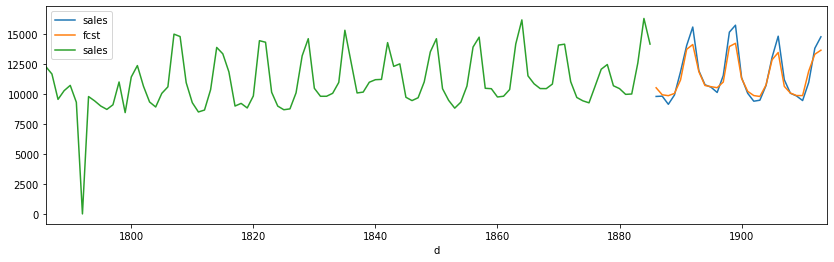

In [8]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level)

## Evaluate

In [9]:
accuracy_df = accuracy(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, level)
accuracy_df

,state_id,cat_id,mse_fcst,mse_naive_insample,weights,msse,rmsse,wrmsse
0,0,0,468468.453414,3.205337e+06,0.237349,0.146153,0.382299,0.090738
1,0,1,42703.132025,9.280698e+04,0.059405,0.460128,0.678328,0.040296
2,0,2,130879.993132,5.251645e+05,0.136996,0.249217,0.499217,0.068391
3,1,0,156507.014899,1.706684e+06,0.147692,0.091702,0.302824,0.044725
4,1,1,20643.844089,3.198486e+04,0.041424,0.645425,0.803384,0.033279
5,1,2,49235.738944,2.112258e+05,0.090253,0.233095,0.482799,0.043574
6,2,0,704940.589278,2.059258e+06,0.184660,0.342327,0.585088,0.108042
7,2,1,15113.799194,4.486487e+04,0.027841,0.336874,0.580408,0.016159
8,2,2,125781.518274,2.020229e+05,0.074380,0.622610,0.789057,0.058690


In [10]:
accuracy_df["weights"].sum()

1.0

In [11]:
accuracy_df["wrmsse"].sum()

0.5038944947623248

## Misc